<a href="https://colab.research.google.com/github/KhushiiChoudhary/Fast-Lane-Internship/blob/main/Traffic_Flow_Prediction_for_Smart_Cities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [ ]:
file_path = "/content/Metro_Interstate_Traffic_Volume.csv"
traffic_data = pd.read_csv(file_path)

In [ ]:
print(traffic_data.head())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  


In [ ]:
print(traffic_data.info())
print(traffic_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB
None
               temp       rain_1h       snow_1h    clouds_all  traffic_volume
count  48204.000000  48204.000000  48204.000000  48204.000000    48204.000000
mean     281.205870      0.334264      0.000222     49.362231     3259.818355
std       13.338232     44.789133      0.

In [ ]:
print("Missing values:")
print(traffic_data.isnull().sum())

Missing values:
holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
dtype: int64


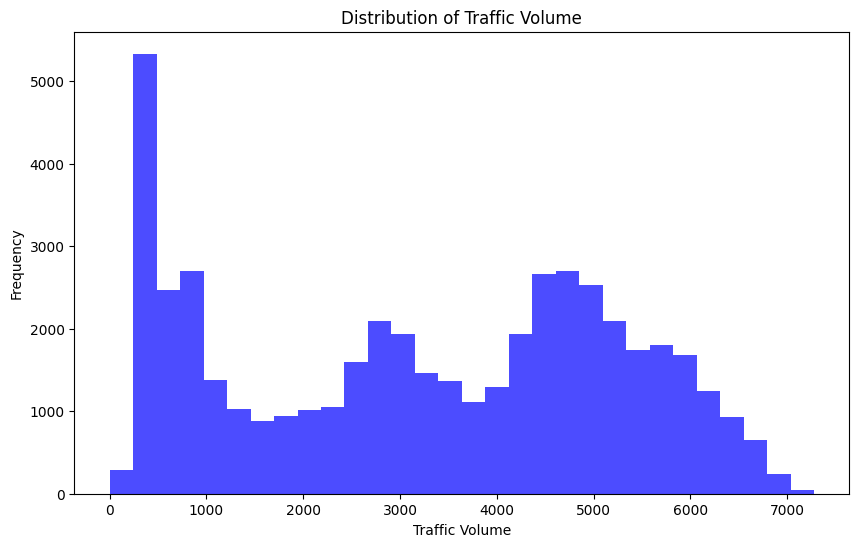

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(traffic_data['traffic_volume'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.show()

In [ ]:
traffic_data['date_time'] = pd.to_datetime(traffic_data['date_time'])
traffic_data['hour'] = traffic_data['date_time'].dt.hour
traffic_data['day_of_week'] = traffic_data['date_time'].dt.dayofweek
traffic_data['month'] = traffic_data['date_time'].dt.month

In [ ]:
lag_hours = [1, 2, 3, 6, 12]

In [ ]:
for lag_hour in lag_hours:
    traffic_data[f'traffic_volume_lag_{lag_hour}'] = traffic_data['traffic_volume'].shift(lag_hour)

In [ ]:
X = traffic_data[['hour', 'day_of_week', 'month']]
y = traffic_data['traffic_volume']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 278.3069653494772


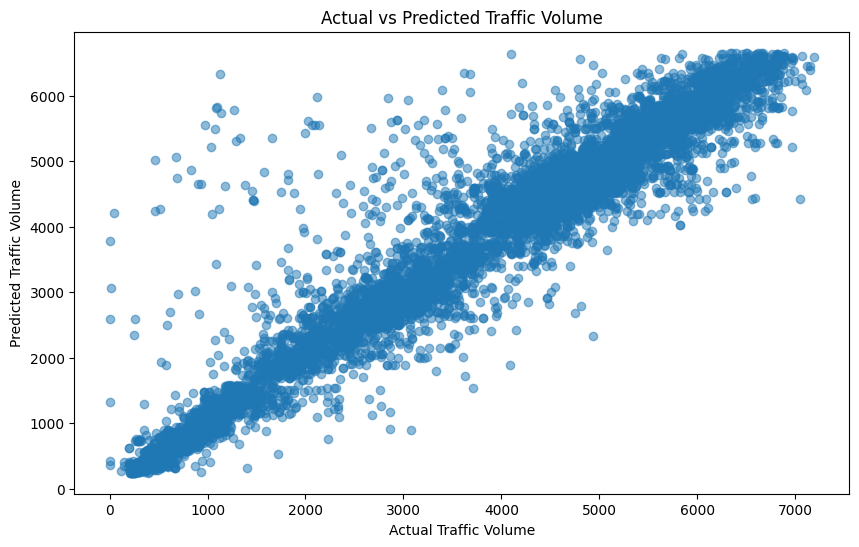

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Traffic Volume')
plt.xlabel('Actual Traffic Volume')
plt.ylabel('Predicted Traffic Volume')
plt.show()

In [ ]:
traffic_data.dropna(inplace=True)

In [ ]:
from scipy.stats import zscore
z_scores = zscore(traffic_data[['hour', 'day_of_week', 'month', 'traffic_volume']])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
traffic_data = traffic_data[filtered_entries]